In [58]:
# %load ~/los_projectados/framework_for_labs/scripts/python_lib.py
#!/usr/bin/env python3

import sys
import os
import numpy as np
import subprocess
import pandas as pd
import pyperclip
import math
import matplotlib.pyplot as plt

def build_graph (X:np.array, Y:np.array, x_name:str, y_name:str, x_dim:str = '', y_dim:str = '', name:str = '', no_line:bool = True, color:str = 'black', color_dot:str = 'blue', include_zero:bool = False, dx:np.array = np.array ([]), dy:np.array = np.array ([]), function:str='none', aprx_l=0, aprx_r=-1, figure=0, line_name=0, aprx_only=False):

    k = -1.0
    b = -1.0

    xlim = min (X) * 0.9
    ylim = min (Y) * 0.8
    if (include_zero):
        xlim = 0
        ylim = 0

    ax1 = 0
    if (figure == 0):
        fig = plt.figure (figsize=(16, 9), dpi=200)
        ax1 = fig.add_subplot (111)
    else:
        fig = figure
        ax1 = fig.axes[0]
    # ax1 = fig.add_subplot (111)
    ax1.set_title (rf'{name}', fontsize=17)
    if (no_line == False): ax1.plot (X, Y, color = color, linestyle = '-', markersize=0, linewidth=0.5)
    if (aprx_only == False):
        if (line_name == 0):ax1.scatter (X, Y, label = rf'{y_name}({x_name})', color = color_dot, marker='+', s=50, linewidths=1)
        else: ax1.scatter (X, Y, label = rf'{y_name}({x_name})' + ' - ' + line_name, color = color_dot, marker='+', s=50, linewidths=1)

    if function == 'lin':
        if (aprx_r == -1):
            aprx_r = len (X)

        model = np.poly1d (np.polyfit (X[aprx_l:aprx_r], Y[aprx_l:aprx_r], deg = 1))
        approx = rf'$({str (model[1])}) * x + ({str (model[0])})$'
        k = float (model[1])
        b = float (model[0])
        x_range = np.linspace (min(X) * 0.9, max (X) * 1.1, 2)
        ax1.plot (x_range, model (x_range), '--', color = 'orange', label = approx)

    ax1.set_xlabel (rf'{x_name}, {x_dim}', size=20)
    ax1.set_ylabel (rf'{y_name}, {y_dim}', size=20)
    ax1.set_xlim (xlim, max (X) * 1.1)
    ax1.set_ylim (ylim, max (Y) * 1.2)
    ax1.legend (fontsize=14)
    ax1.grid ()
    return (fig, (k, b))



#write_as_column - outputs as table column
#vertical=True - outputs a transponded version
#vertical=False - outputs a non transponded version
#if total_rows > amount of resulting rows then add empty elements
#if total_columns > amount of resulting columns then add empty columns
def arr_to_tex (arr:np.ndarray, outfile:str = '/dev/null', append:bool = False, to_clip:bool = False, precision=2, as_column:bool=False, vertical:bool=False, header:bool=True, col_total:int=0, row_total:int=0, caption:str = ''):
    tex_out =''
    if (header):
        tex_out += '\n\\begin{table}[H]\n\\caption{' + caption + '}\n\\begin{center}\n\\begin{tabular}{|c|*{15}{c|}}\\hline\n'

    if (arr.ndim == 1):
        for i in arr:
            if (isinstance (i, str)): tex_out += i
            else: tex_out += str (round (i, precision))
            tex_out += ' & '
            if (as_column): tex_out += '\n'
        if (as_column): tex_out += ' & \n' * max (0, row_total - len (arr))
        else: tex_out = tex_out[:-3] +  ' & ' * max (0, col_total - len (arr)) + '\\\\\\hline\n'
    elif (arr.ndim == 2):
        if (vertical):
            row_n = arr.shape[0]
            col_n = arr.shape[1]
            for i in range (row_n):
                for j in range (col_n):
                    if (isinstance (arr[j][i], str)): tex_out += arr[j][i]
                    else: tex_out += str (round (arr[j][i], precision))
                    tex_out += ' & '
                tex_out = tex_out[:-3] +  ' & ' * max (0, col_total - col_n) + '\\\\\\hline\n'
            tex_out += (' & ' * col_total + '\\\\\\hline\n') * row_total
        else:
            row_n = arr.shape[1]
            col_n = arr.shape[0]
            for i in arr:
                for j in i:
                    if (isinstance (j, str)): tex_out += j
                    else: tex_out += str (round (j, precision))
                    tex_out += ' & '
                tex_out = tex_out[:-3] +  ' & ' * max (0, col_total - col_n) + '\\\\\\hline\n'
            tex_out += (' & ' * col_total + '\\\\\\hline\n') * row_total

    if (header): tex_out += '\\end{tabular}\n\\end{center}\n\\end{table}\n\n'

    if (to_clip):
        clip_content = ''
        if (append): clip_content = pyperclip.paste ()
        clip_content += tex_out
        pyperclip.copy (clip_content)

    open_str = 'w'
    if (append): open_str = 'a'

    with open (outfile, open_str) as output:
        print (tex_out, file = output)


[14.11 16.11 18.11 20.11 22.8  24.07 26.09 28.09 30.08 32.06 34.05 36.04
 38.06 40.04]
[13.846 15.894 17.822 19.99  22.584 23.734 25.922 27.994 29.96  31.796
 33.762 35.656 37.844 39.8  ]


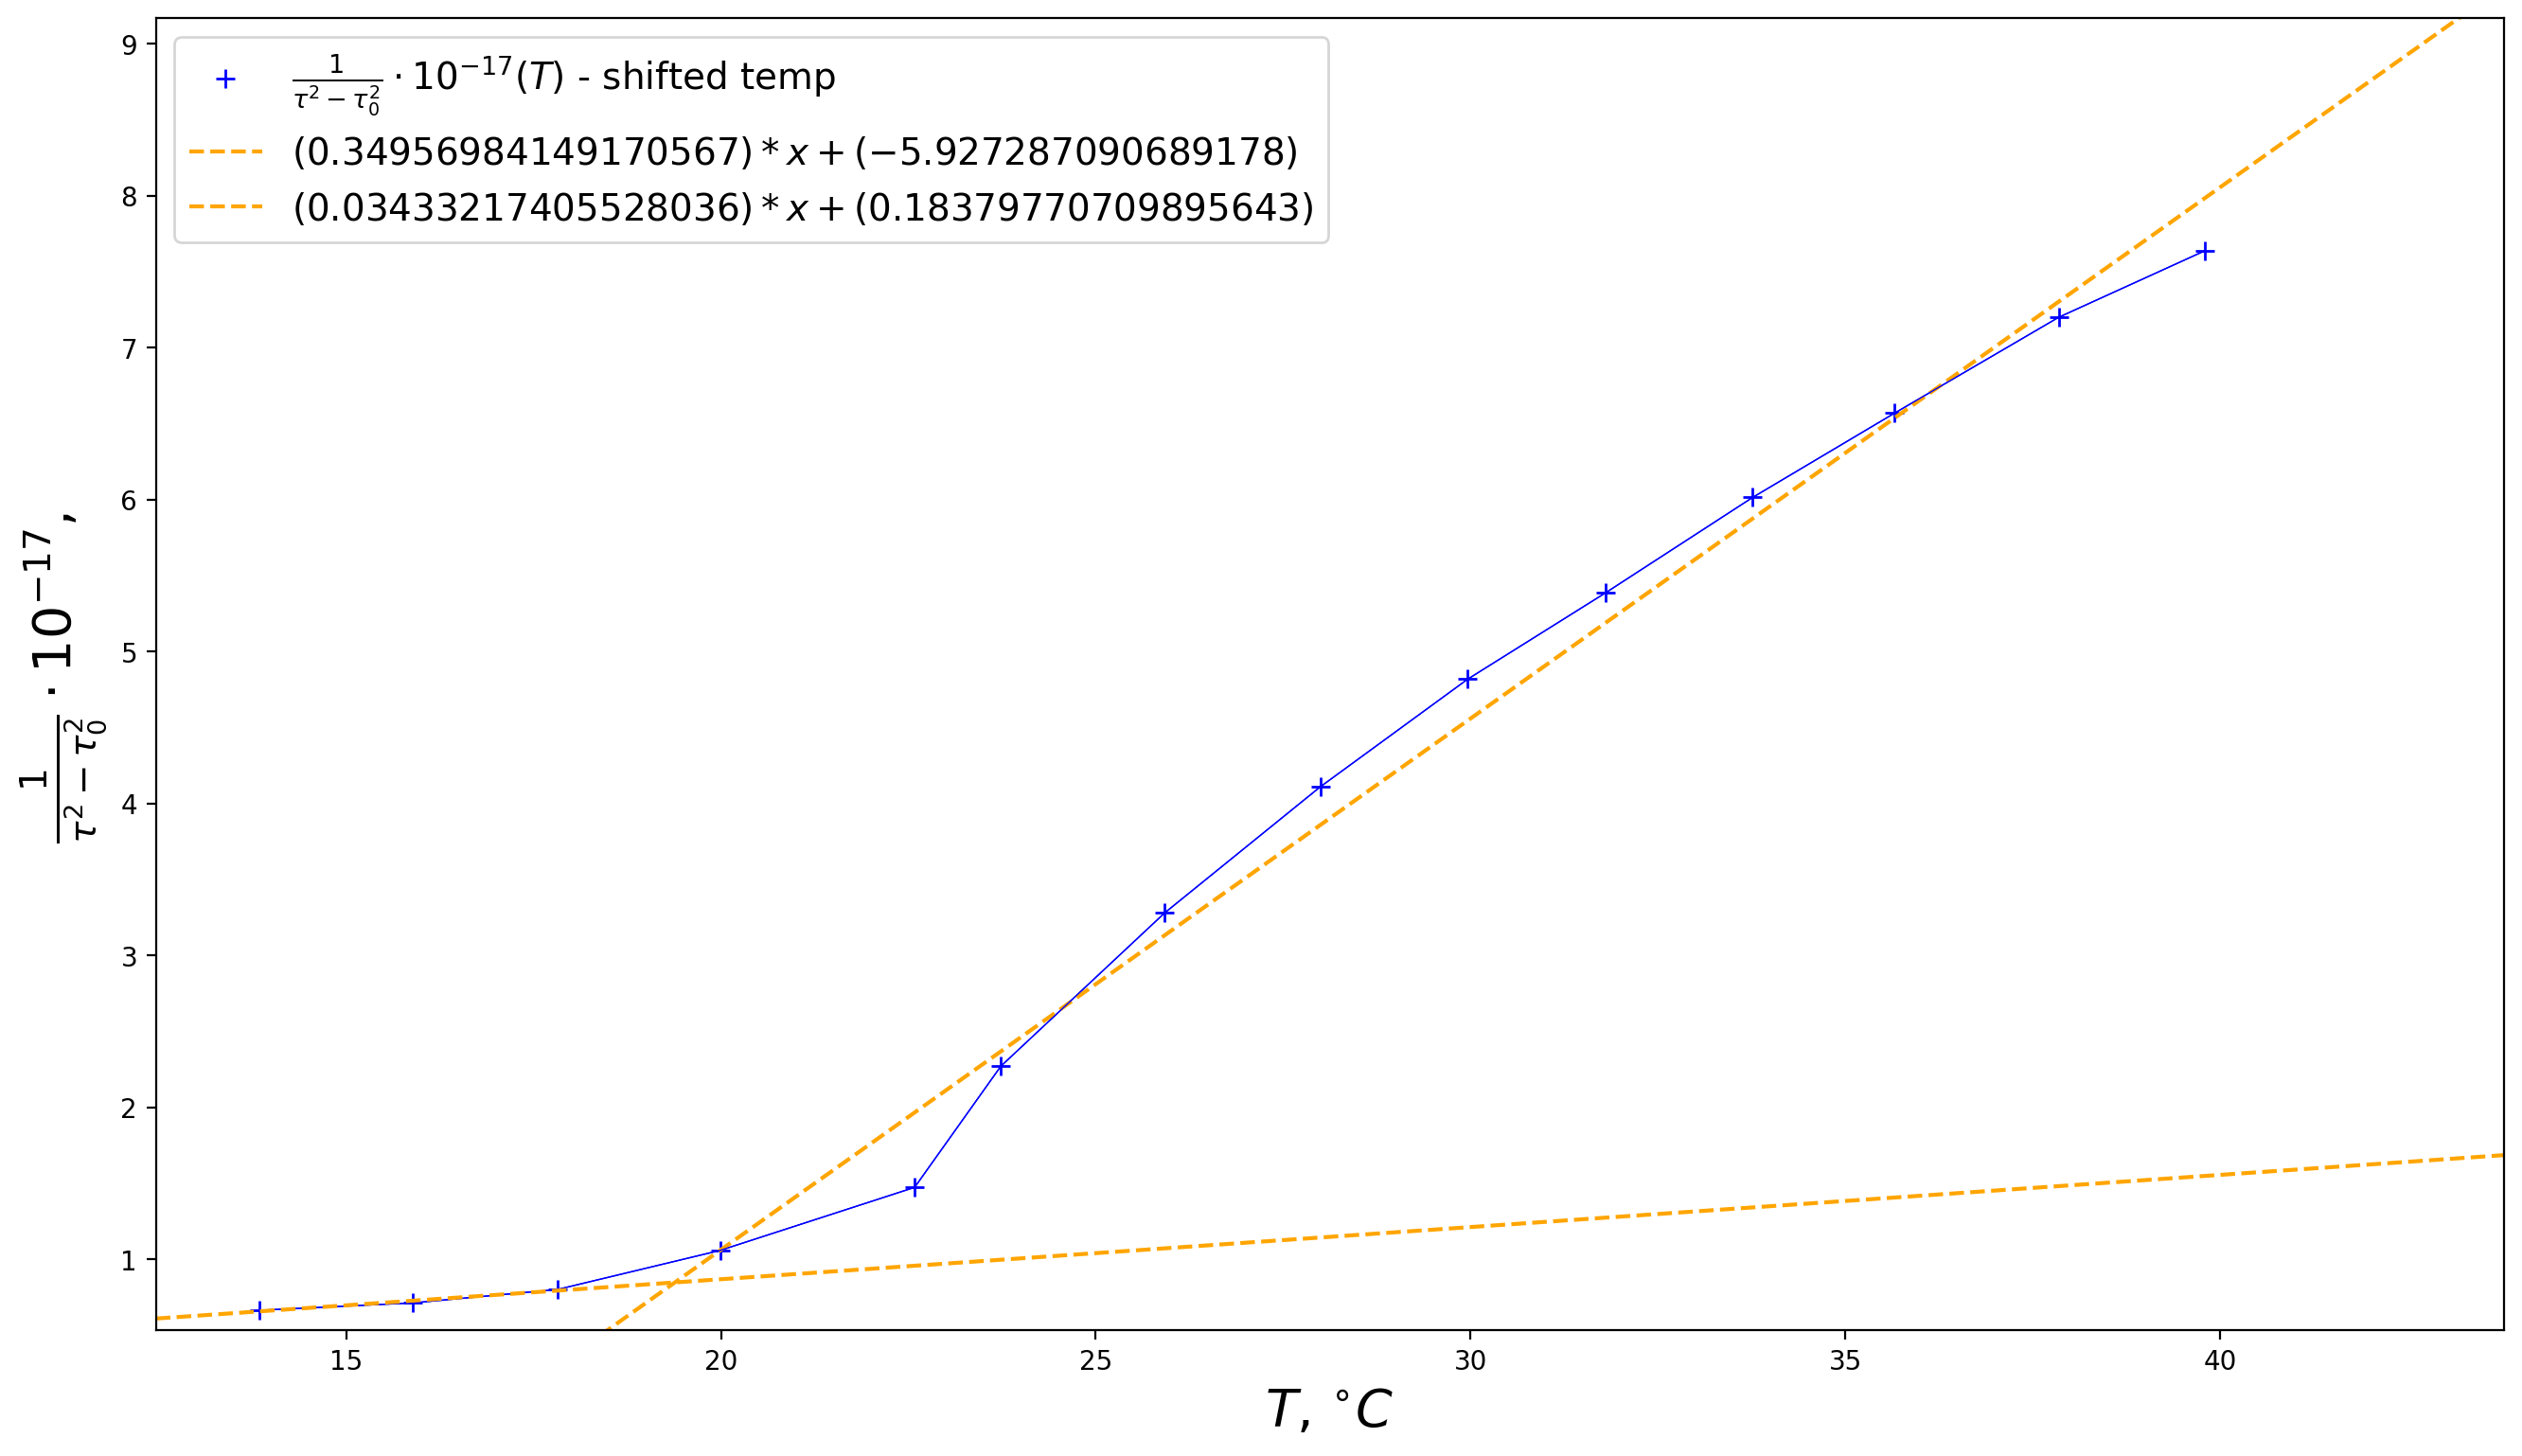

0.34956984149170567 -5.927287090689178
16.955945242289488
-5.353512038096171


In [ ]:


T = np.array([14.11,16.11,18.11,20.11,22.8,24.07,26.09,28.09,30.08,32.06,34.05,36.04,38.06,40.04])
dU = np.array ([-11, -9, -12, -5, -9, -14, -7, -4, -5, -11, -12, -16, -9, -10]) * 10 **-6
k = 24 * 10**3
T1 = T + dU * k
print (T)
print (T1)
tau_0 = 6.9092 * 10**-9
tau = np.array([7.9212,7.8567,7.758,7.5611,7.3836,7.2207,7.1263,7.0831,7.0578,7.0423,7.0285,7.0185,7.009,7.0033]) * 10**-9

y = 1/(tau**2 - tau_0**2)
y = y / 1e17

(fig, (k, b)) = build_graph (T1, y, r'$T$', r'$\frac{1}{\tau^2 - \tau_0^2} \cdot 10^{-17}$', x_dim= r'$^{\circ}C$', no_line=False, function='lin', aprx_l=4, include_zero=False, color='blue', color_dot='blue', line_name='shifted temp')
# (fig, (k1, b1)) = build_graph (T, y, r'$T$', r'$\frac{1}{\tau^2 - \tau_0^2} \cdot 10^{-17}$', x_dim= r'$^{\circ}C$', no_line=False, function='lin', aprx_l=4, include_zero=False, figure=fig, color='red', color_dot='red', line_name='temp')
(fig, (k1, b1)) = build_graph (T1, y, r'$T$', r'$\frac{1}{\tau^2 - \tau_0^2} \cdot 10^{-17}$', x_dim= r'$^{\circ}C$', no_line=False, function='lin', aprx_l=0, aprx_r=3, include_zero=False, color='blue', color_dot='blue', line_name='shifted temp', aprx_only=True, figure=fig)

plt.show ()
fig.savefig ('lol.png')
print (k, b)
print (- b / k)
print (-b1 / k1)